# Problem Statement
* To build a regression model to predict the concrete compressive strength based on the different features in the training data. 


### Data Description
#### Given is the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

* Name -- Data Type -- Measurement -- Description

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

* Age -- quantitative -- Day (1~365) -- Input Variable

* Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Data Collection

In [2]:
cemdf = pd.read_csv('E:\project\cement strength analysis\concrete.csv')

In [3]:
cemdf

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [4]:
cemdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
cemdf.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# Data Cleaning

In [6]:
cemdf.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
cemdf.duplicated().sum()

25

In [8]:
cemdf['duplicates'] = cemdf.duplicated()

In [9]:
cemdf.drop_duplicates(inplace=True)

In [10]:
cemdf.shape

(1016, 10)

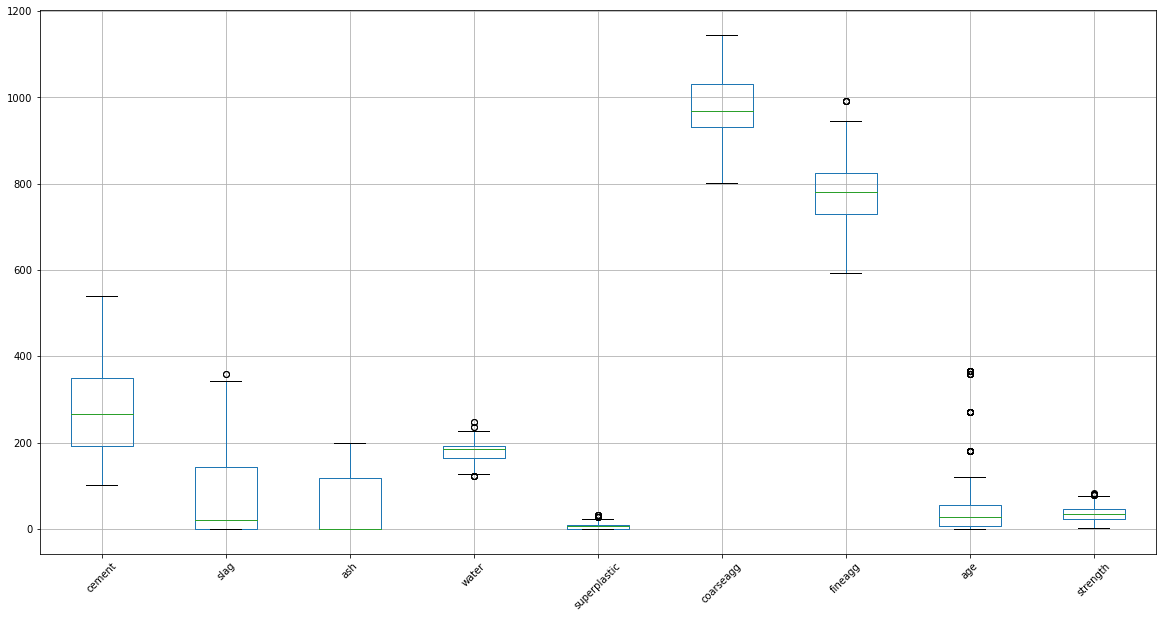

In [11]:
# Create a boxplot for all the continuous features
cemdf.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

In [12]:
contineous = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']

cement:


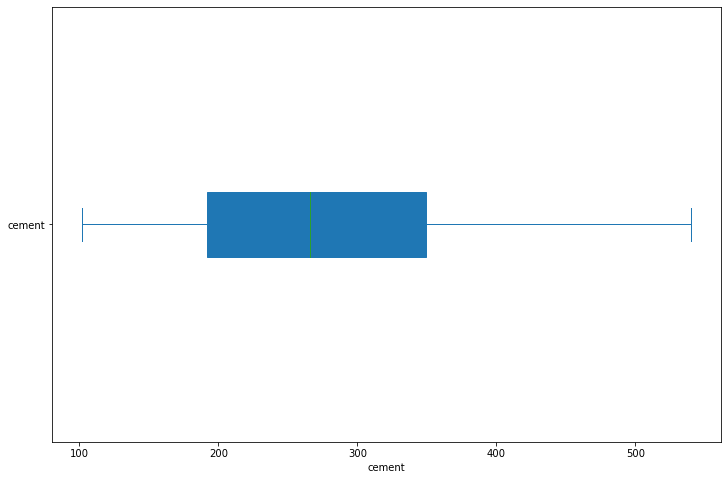

left limit :-44.31249999999997
right limit :584.9875
iqr:157.325


In [ ]:
for i in contineous:
    print(i+ ':')
    plt.figure(figsize=(12,8))
    cemdf[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr = cemdf[i].describe()['75%'] - cemdf[i].describe()['25%']
    right_lim=cemdf[i].quantile(0.75)+1.5*iqr
    leftt_lim=cemdf[i].quantile(0.25)-1.5*iqr
    print('left limit :{}'.format(leftt_lim))
    print('right limit :{}'.format(right_lim))
    print("iqr:{}".format(iqr))
    a = input("for left outlier type 'left': for right outlier type 'right': for both outlier type 'both': for no outlier type 'no'")
    a=a.lower()
    if a=='left':
        lo=float(input('enter the number you want to replace'))
        cemdf[i]=[lo if val<leftt_lim else val for val in cemdf[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        cemdf[i]=[ro if val>right_lim else val for val in cemdf[i]]
    elif a=='both':
        lo=float(input('by what number do you want to replace left outlier'))
        ro=float(input('by what number do you want to replace right outlier'))
        cemdf[i]=[ro if val>right_lim else val for val in cemdf[i]]
        cemdf[i]=[lo if val<leftt_lim else val for val in cemdf[i]]
    elif a=='no':
        pass
    plt.figure(figsize=(20,10))
    cemdf[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

In [ ]:
cemdf.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

In [ ]:
cemdf.describe()

In [ ]:
cemdf.describe().T

### Data Cleaning Summary

* We had 25 duplicate instances in dataset and dropped those duplicates.
* We had outliers in 'Water', 'Superplastic', 'Fineagg', 'Age' and 'Strength' column also, handled these outliers by replacing every outlier with upper side of the whisker.
* We had outliers in 'Water' column also, handled these outliers by replacing every outlier with lower side of the whisker.
* No missing values in dataset.

In [ ]:
# cols = [i for i in cemdf.columns if i not in 'strength']
# length = len(cols)
# cs = ["b","r","g","c","m","k","lime","c"]
# fig = plt.figure(figsize=(13,25))

# for i,j,k in itertools.zip_longest(cols,range(length),cs):
#     plt.subplot(4,2,j+1)
#     ax = sns.distplot(cemdf[i],color=k,rug=True)
#     ax.set_facecolor("w")
#     plt.axvline(cemdf[i].mean(),linestyle="dashed",label="mean",color="k")
#     plt.legend(loc="best")
#     plt.title(i,color="navy")
#     plt.xlabel("")

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in cemdf.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(cemdf[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
X = cemdf.drop(['strength'],axis=1)
y = cemdf['strength']

import warnings
warnings.simplefilter('ignore')

In [ ]:
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
# let's check how our features are related to the target column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(X[column],y)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()

In [ ]:
cemdf

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
cemdf.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
v = cemdf[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']]

In [ ]:
vif_data = pd.DataFrame()

In [ ]:
vif_data['features'] = v.columns

In [ ]:
vif_data['VIF'] = [variance_inflation_factor(v.values, i) for i in range(len(v.columns))]

In [ ]:
vif_data

In [ ]:
cemdf.drop(['cement','water','coarseagg','fineagg'],1,inplace=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
sgdr.fit(X,y)

In [ ]:
train_pred = sgdr.predict(x_train)

In [ ]:
mse = mean_squared_error(train_pred,y_train)
rmse = mse**(1/2)
R_sqr = sgdr.score(x_train,y_train)
print(mse)
print(rmse)
print(R_sqr)

## before log transformation values
# 2.971549658180061e+24
# 1723818336768.7156
# -1.0879988671380476e+22

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(x_train,y_train)

In [ ]:
dt_train_pred = dtr.predict(x_train)

In [ ]:
dtr.score(x_train,y_train)

In [ ]:
test_pred= dtr.predict(x_test)

In [ ]:
dtr.score(x_test,y_test)

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]
mse_train, mse_test = [],[]

In [ ]:
for i in depth:
    prdctr = DecisionTreeRegressor(max_depth= i)       
    prdctr.fit(x_train, y_train)
    y_train_pred=prdctr.predict(x_train)
    y_test_pred=prdctr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

In [ ]:
sns.set()
plt.figure(figsize = (12,7))
sns.lineplot(y=mse_train, x = depth, label = 'Train_mse')
sns.lineplot(y=mse_test, x = depth, label = 'Test_mse')
plt.xticks(ticks=np.arange(1,12,1))
plt.show()

In [ ]:
regr_test = DecisionTreeRegressor(max_depth=4)
regr_test.fit(x_train, y_train)
y_pred_test=regr_test.predict(x_test)

In [ ]:
regr_test.score(x_train,y_train)

In [ ]:
regr_test.score(x_test,y_test)

# RandomForest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
# fit the regressor with x and y data
mod = regressor.fit(x_train, y_train)

In [ ]:
params = {'max_depth': [2,4,6,7,8]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rgr = RandomizedSearchCV(regressor, params, n_iter=10, cv= 3)

In [ ]:
mod.score(x_train,y_train)

In [ ]:
y_pred = mod.predict(x_test)

In [ ]:
mod.score(x_test,y_test)

In [ ]:
mse = mean_squared_error(y_pred,y_test)
mse

In [ ]:
rmse = mse**(1/2)
rmse

In [ ]:
y_pred_train = mod.predict(x_train)

In [ ]:
mseT = mean_squared_error(y_train, y_pred_train)
mseT

In [ ]:
rmseT = mseT**(1/2)
rmseT